In [46]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

import scipy as sp
import scipy.cluster.hierarchy as sch
import collections

sns.set_style('whitegrid')

# Problem Definition

### Cluster companies by financial features

# Load File

In [15]:
df = pd.read_csv('../../Dataset/Dataset_clean/stats_pred.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
df

,Ticker,Trailing_P/E,Price/Sales,Profit_Margin,Return_on_Assets,Market_Cap,Enterprise_Value/Revenue,Revenue,Gross_Profit,Net_Income_Avl_to_Common_,Earnings_Growth,Total_Cash_Per_Share,Total_Cash,Total_Debt,Cash_Flow
0,AAPL,18.955339,3.162871,14.665882,11.864519,8.501000e+10,2.690536,2.690536,1.115000e+10,4.830000e+09,36.333940,26.972280,2.449000e+10,1.016667e+00,9.600000e+09
1,ABC,18.065000,0.130000,0.728750,4.011818,6.745000e+09,0.185000,0.185000,2.205000e+09,4.779400e+08,26.750000,6.263400,1.006585e+09,1.285000e+09,8.646300e+08
2,ABT,20.600000,3.070556,14.312000,9.806000,8.410000e+10,3.381176,3.381176,1.266000e+10,3.400000e+09,12.300000,1.953667,2.420000e+09,1.224000e+10,5.420000e+09
3,ADBE,34.822500,8.311199,22.610910,9.785000,1.826000e+10,7.498947,7.498947,2.280000e+09,5.445900e+08,36.076833,4.213456,2.020000e+09,3.500000e+08,1.020000e+09
4,ADI,23.256667,4.687000,20.957778,10.633333,1.234500e+10,3.758182,3.758182,1.520000e+09,5.129400e+08,92.066667,6.234375,2.220000e+09,6.495571e+00,6.545200e+08
5,ADM,14.734944,0.413577,2.695052,4.448333,2.151000e+10,0.539843,0.539843,2.970000e+09,1.600000e+09,12.050000,1.916159,1.310000e+09,5.820000e+09,7.671050e+08
6,ADSK,32.046471,4.606448,16.566667,15.880000,7.000000e+09,4.276399,4.276399,1.350000e+09,2.916000e+08,36.904537,3.113286,5.326900e+08,1.275500e+00,4.421000e+08
7,AEE,15.795000,1.429091,9.145000,4.028750,1.055000e+10,2.382727,2.382727,3.280000e+09,5.710000e+08,28.950000,1.475429,2.780000e+08,6.350000e+09,1.270000e+09
8,AEP,16.840000,1.177143,7.722500,3.178333,1.793000e+10,2.215556,2.215556,7.950000e+09,1.110000e+09,42.550000,1.588429,6.220000e+08,1.415000e+10,2.730000e+09
9,AFL,16.656667,1.453636,9.178750,2.165000,2.041500e+10,1.461538,1.461538,1.328000e+10,1.350000e+09,11.550000,2.712571,1.265000e+09,1.425000e+09,4.355000e+09


# Feature Engineering

In [39]:
X_columns = ['Trailing_P/E', 'Price/Sales', 'Profit_Margin', 'Return_on_Assets', 'Market_Cap', 'Revenue', 'Gross_Profit', 'Earnings_Growth', 'Total_Cash', 'Total_Debt', 'Cash_Flow']
# normalize the data
for col in X_columns:
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

# Model Training

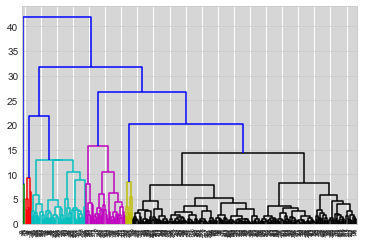

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
Counter({14: 119, 15: 91, 5: 18, 11: 16, 10: 14, 4: 13, 7: 11, 9: 7, 6: 7, 2: 4, 12: 4, 1: 3, 13: 3, 3: 2, 8: 2})


In [40]:
# k: number of clusters
k = 15
color_threshold = 20

# distance of clusters
d = sch.distance.pdist(df[X_columns])

# Build a tree of clusters using the distance matrix
# d: distance matrix
# method: linkage algorithm; ward: minimal increase of sum-of-squares
Z= sch.linkage(d, method = 'ward',  metric = 'euclidean')

# Tell where to cut the trees using k 
# maxclust: finds a minimum threshold r
T = sch.fcluster(Z, k, 'maxclust')

P = sch.dendrogram(Z, color_threshold=color_threshold)

plt.show()
print(set(T))
print(collections.Counter(T))

df_results = df.copy()

#Create a new column storing which cluster the country belongs to  
df_results['cluster'] = T
df['cluster'] = T

In [41]:
# Analyze the results
for cluster in set(T):
    print((cluster), (len(df_results[df_results['cluster']==cluster]['Ticker'])))
    print(sorted(list(df_results[df_results['cluster']==cluster]['Ticker'])))

1 3
['BAC', 'C', 'JPM']
2 4
['AKAM', 'ALXN', 'EBAY', 'FB']
3 2
['CELG', 'CRM']
4 13
['AIV', 'AMT', 'CCI', 'COG', 'EQR', 'KMI', 'KSU', 'MAC', 'MNST', 'PBCT', 'RHT', 'RRC', 'SPG']
5 18
['APA', 'APC', 'BBT', 'BK', 'CHK', 'CMA', 'COF', 'DFS', 'DVN', 'ETFC', 'GLW', 'HBAN', 'KEY', 'MTB', 'PNC', 'STI', 'STT', 'USB']
6 7
['AVB', 'BXP', 'CME', 'HCN', 'HCP', 'KIM', 'LUK']
7 11
['ADBE', 'BIIB', 'CTSH', 'EOG', 'FFIV', 'GRMN', 'ISRG', 'MCHP', 'PAYX', 'QCOM', 'V']
8 2
['GILD', 'MCO']
9 7
['AIG', 'CVX', 'IBM', 'MSFT', 'PFE', 'PG', 'T']
10 14
['AAPL', 'ABT', 'AMGN', 'CSCO', 'HD', 'INTC', 'KO', 'MO', 'MRK', 'OXY', 'PEP', 'PM', 'UNH', 'UPS']
11 16
['ALL', 'AXP', 'BA', 'CAT', 'DIS', 'F', 'GM', 'HIG', 'HPQ', 'LYB', 'MET', 'NWSA', 'PRU', 'TGT', 'TRV', 'UTX']
12 4
['CF', 'LUV', 'MOS', 'PHM']
13 3
['EL', 'IP', 'VNO']
14 119
['ABC', 'ADM', 'AEE', 'AEP', 'AFL', 'AIZ', 'AMP', 'AON', 'APD', 'ATVI', 'AVY', 'BBY', 'BLL', 'BWA', 'CAG', 'CAH', 'CB', 'CBG', 'CCL', 'CI', 'CINF', 'CMS', 'CNP', 'COST', 'CSX', 'CTL', 'CV

In [42]:
# Analyze the centroids
df_results.groupby('cluster').mean().round(2).T

cluster,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Trailing_P/E,-5.500000e-01,3.900000e+00,8.45,1.630000e+00,-5.500000e-01,-1.000000e-02,3.800000e-01,2.200000e-01,-4.100000e-01,-2.400000e-01,-4.700000e-01,-3.200000e-01,9.000000e-02,-2.300000e-01,-5.000000e-02
Price/Sales,-1.200000e-01,4.310000e+00,4.67,1.200000e+00,9.000000e-02,2.070000e+00,1.640000e+00,2.520000e+00,-1.800000e-01,1.300000e-01,-6.300000e-01,-4.100000e-01,-9.000000e-02,-4.800000e-01,-1.400000e-01
Profit_Margin,1.290000e+00,4.800000e-01,-0.65,-1.300000e-01,1.710000e+00,3.210000e+00,1.310000e+00,2.430000e+00,3.800000e-01,5.800000e-01,-4.400000e-01,-8.000000e-02,-3.200000e-01,-5.500000e-01,-1.300000e-01
Return_on_Assets,-1.400000e+00,1.200000e-01,-0.69,-9.600000e-01,-9.600000e-01,-8.200000e-01,9.800000e-01,5.510000e+00,2.200000e-01,1.030000e+00,-6.700000e-01,4.500000e-01,-3.700000e-01,-4.900000e-01,7.800000e-01
Market_Cap,4.300000e+00,1.200000e-01,-0.32,-4.800000e-01,0.000000e+00,-4.500000e-01,-1.000000e-01,-6.000000e-02,4.130000e+00,1.980000e+00,5.100000e-01,-3.900000e-01,-2.700000e-01,-3.200000e-01,-2.900000e-01
Enterprise_Value/Revenue,3.320000e+00,1.336000e+01,14.23,8.080000e+00,5.240000e+00,1.153000e+01,6.450000e+00,8.990000e+00,2.290000e+00,3.000000e+00,1.280000e+00,1.600000e+00,3.590000e+00,1.610000e+00,2.340000e+00
Revenue,1.000000e-01,3.460000e+00,3.75,1.680000e+00,7.300000e-01,2.840000e+00,1.140000e+00,1.990000e+00,-2.600000e-01,-2.000000e-02,-6.000000e-01,-4.900000e-01,1.800000e-01,-4.900000e-01,-2.400000e-01
Gross_Profit,7.060000e+00,-3.700000e-01,-0.46,-4.400000e-01,-7.000000e-02,-4.400000e-01,-3.200000e-01,-3.600000e-01,3.240000e+00,8.200000e-01,8.700000e-01,-3.700000e-01,-2.000000e-01,-2.000000e-01,-2.900000e-01
Net_Income_Avl_to_Common_,1.467667e+10,3.958725e+08,56767499.90,1.383073e+08,1.859396e+09,2.985286e+08,7.177009e+08,7.731000e+08,1.256714e+10,5.489643e+09,3.808125e+09,9.263200e+08,5.213367e+08,7.763579e+08,7.194269e+08
Earnings_Growth,-1.800000e-01,-1.500000e-01,2.78,-2.600000e-01,6.000000e-02,2.000000e-02,-3.000000e-02,-1.600000e-01,-7.000000e-02,2.600000e-01,-1.300000e-01,3.390000e+00,7.820000e+00,-1.500000e-01,-2.300000e-01


Trailing_P/E


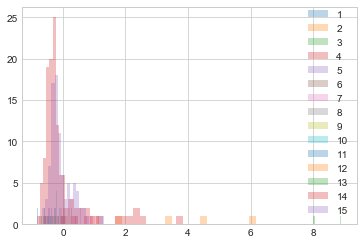

Price/Sales


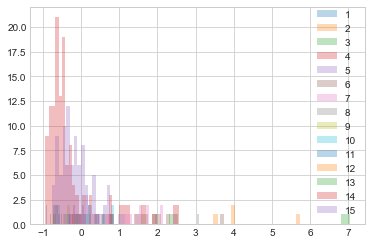

Profit_Margin


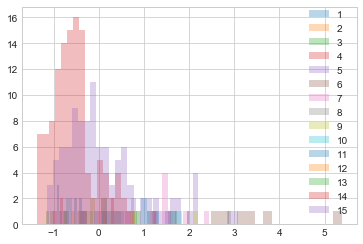

Return_on_Assets


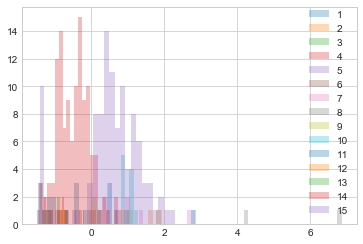

Market_Cap


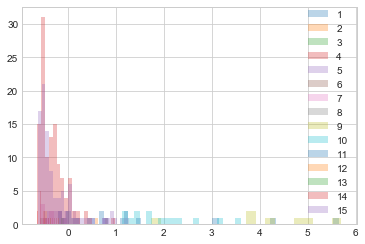

Revenue


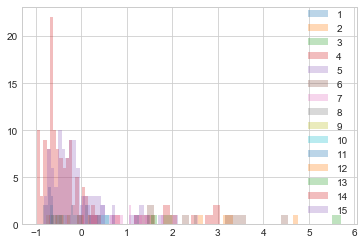

Gross_Profit


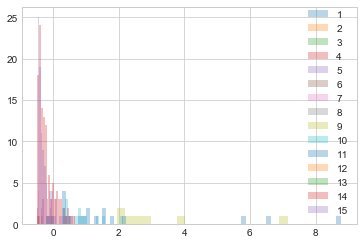

Earnings_Growth


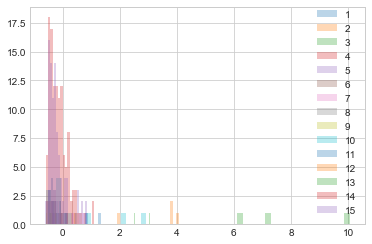

Total_Cash


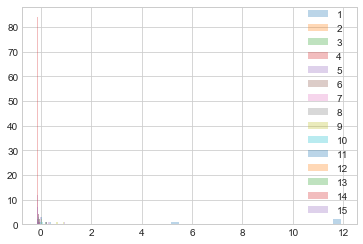

Total_Debt


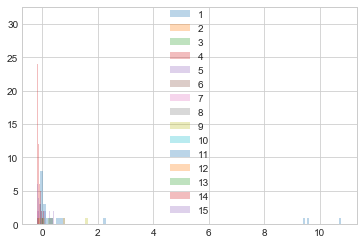

Cash_Flow


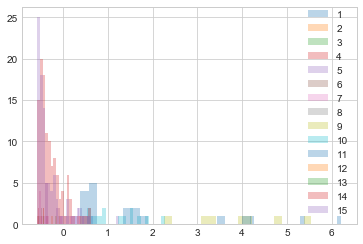

In [43]:
# Analyze the results
for col in X_columns:
    print(col)
    for cluster in set(T):
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
    plt.legend()
    plt.show()

15
Trailing_P/E


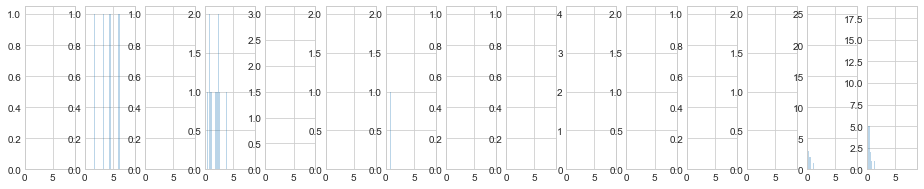

Price/Sales


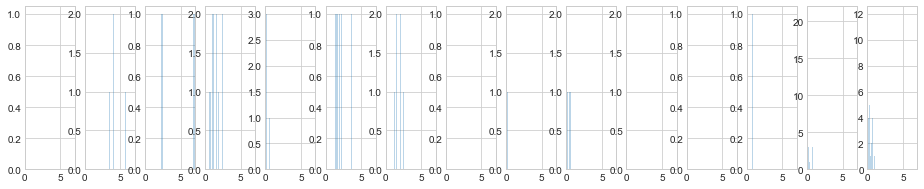

Profit_Margin


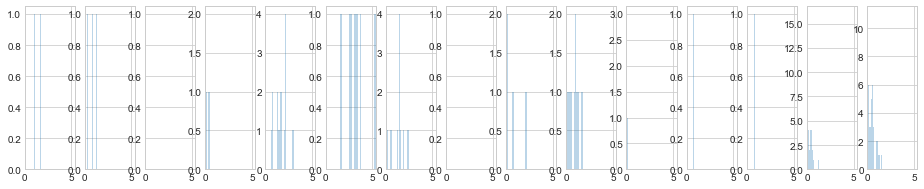

Return_on_Assets


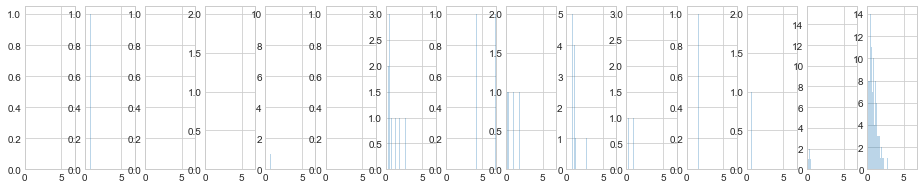

Market_Cap


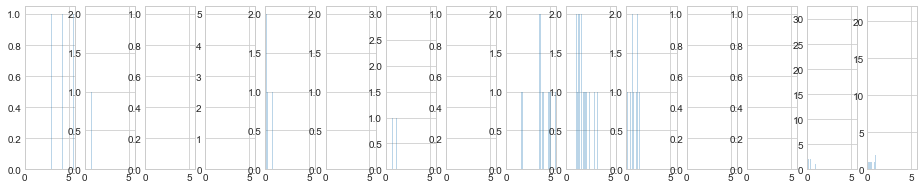

Revenue


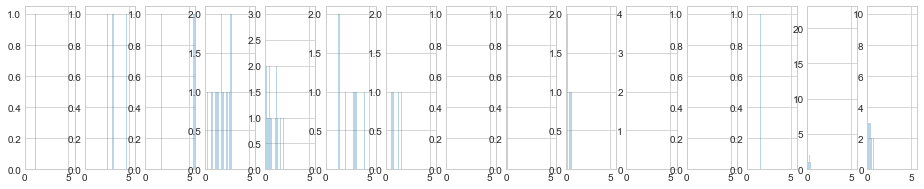

Gross_Profit


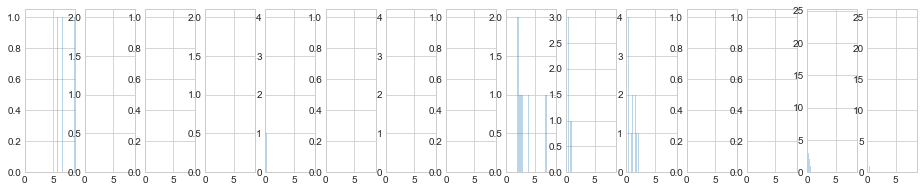

Earnings_Growth


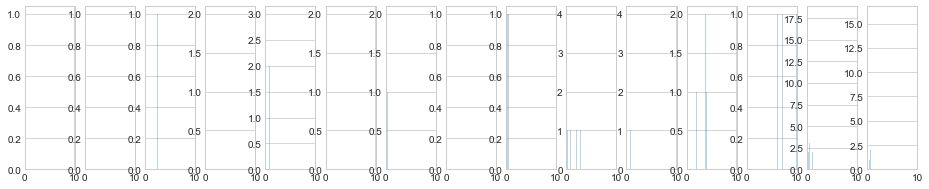

Total_Cash


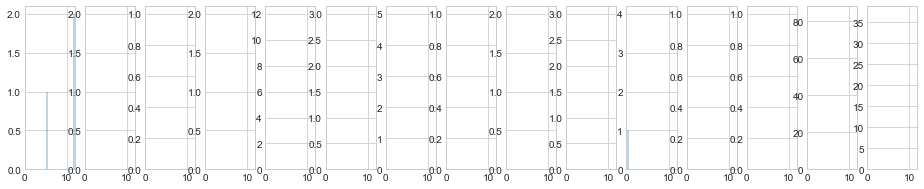

Total_Debt


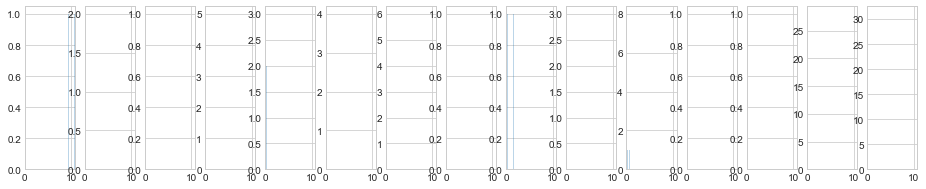

Cash_Flow


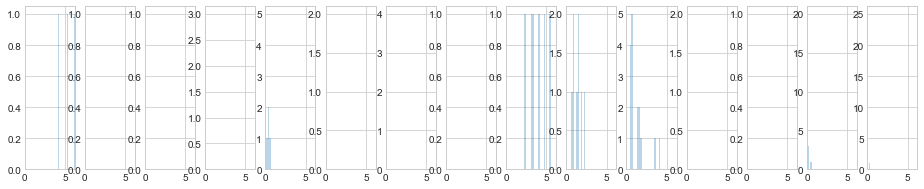

In [44]:
# Analyze the results
n_clusters = len(set(T))
print(n_clusters)
for col in X_columns:
    print(col)
    i = 1
    plt.figure(figsize=(16,3))
    for cluster in sorted(set(T)):
        plt.subplot(1, n_clusters, i)
        plt.xlim([0,df_results[col].max()])
        plt.hist(df_results[df_results['cluster']==cluster][col], label=str(cluster), alpha=0.3, bins=20)
        i += 1
    plt.show()

Trailing_P/E


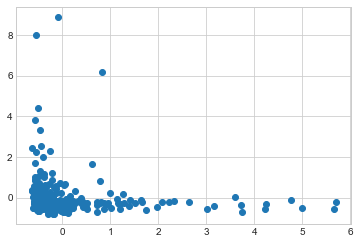

Price/Sales


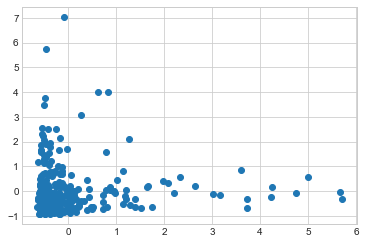

Market_Cap


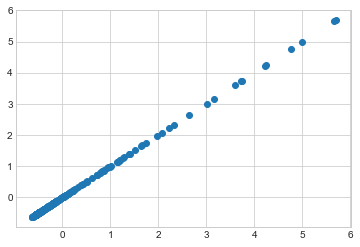

Revenue


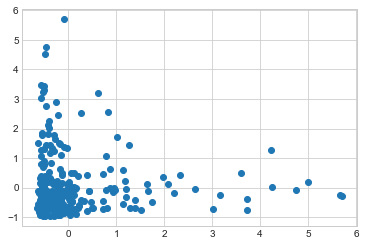

Gross_Profit


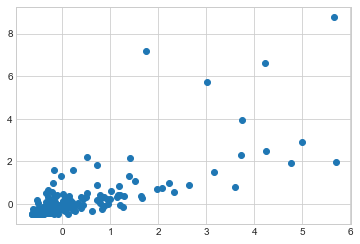

Earnings_Growth


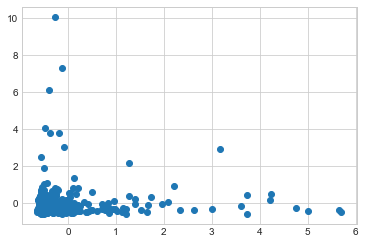

Total_Debt


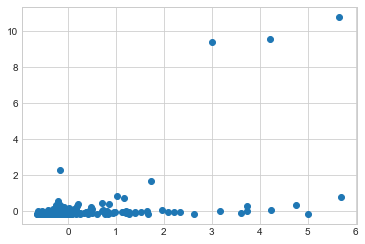

Cash_Flow


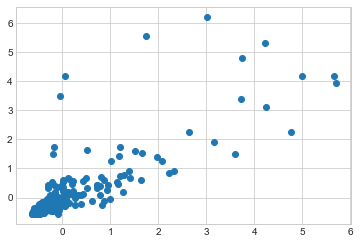

In [45]:
# Analyze the correlation with Happiness Score
for c in ['Trailing_P/E', 'Price/Sales', 'Market_Cap', 'Revenue', 'Gross_Profit', 'Earnings_Growth', 'Total_Debt', 'Cash_Flow']:
    print(c)
    plt.plot(df_results['Market_Cap'], df_results[c], 'o')
    plt.show()